In [16]:
#Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Regressor Models
from xgboost import XGBRegressor

# data processing
from sklearn import metrics
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

#Otros
import optuna

In [10]:
data=pd.read_csv('../../Data/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Associate,167500,USD,167500,US,0,US,M
1,2024,MI,FT,Associate,106500,USD,106500,US,0,US,M
2,2024,SE,FT,Data Engineer,183300,USD,183300,US,0,US,M
3,2024,SE,FT,Data Engineer,101400,USD,101400,US,0,US,M
4,2024,SE,FT,Data Scientist,250200,USD,250200,US,0,US,M


In [11]:
data.drop(['salary_currency','salary'],inplace=True,axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Associate,167500,US,0,US,M
1,2024,MI,FT,Associate,106500,US,0,US,M
2,2024,SE,FT,Data Engineer,183300,US,0,US,M
3,2024,SE,FT,Data Engineer,101400,US,0,US,M
4,2024,SE,FT,Data Scientist,250200,US,0,US,M


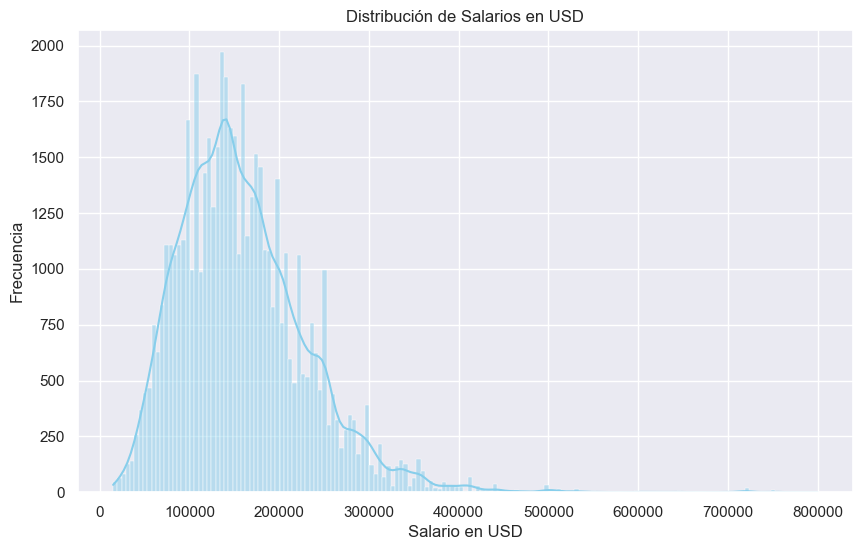

In [23]:
sns.set(style="darkgrid")

# 1. Distribución de salarios en USD
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='salary_in_usd', kde=True, color="skyblue")
plt.title("Distribución de Salarios en USD")
plt.xlabel("Salario en USD")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\WD\AppData\Local\Temp\ipykernel_3216\2596841720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='job_title', y='salary_in_usd', estimator='mean', palette="viridis")


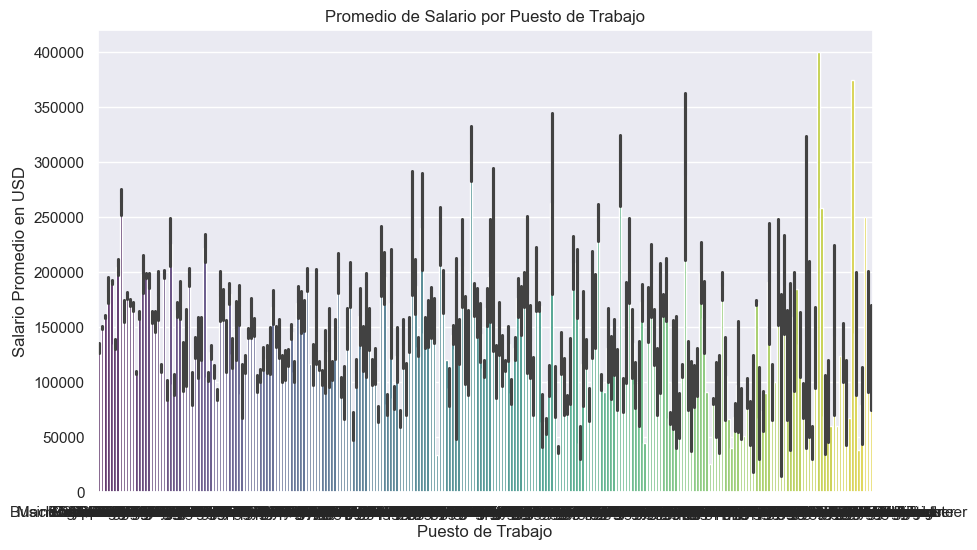

In [24]:
#Frecuencia de experiencia por tipo de empleo
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='job_title', y='salary_in_usd', estimator='mean', palette="viridis")
plt.title("Promedio de Salario por Puesto de Trabajo")
plt.xlabel("Puesto de Trabajo")
plt.ylabel("Salario Promedio en USD")
plt.show()

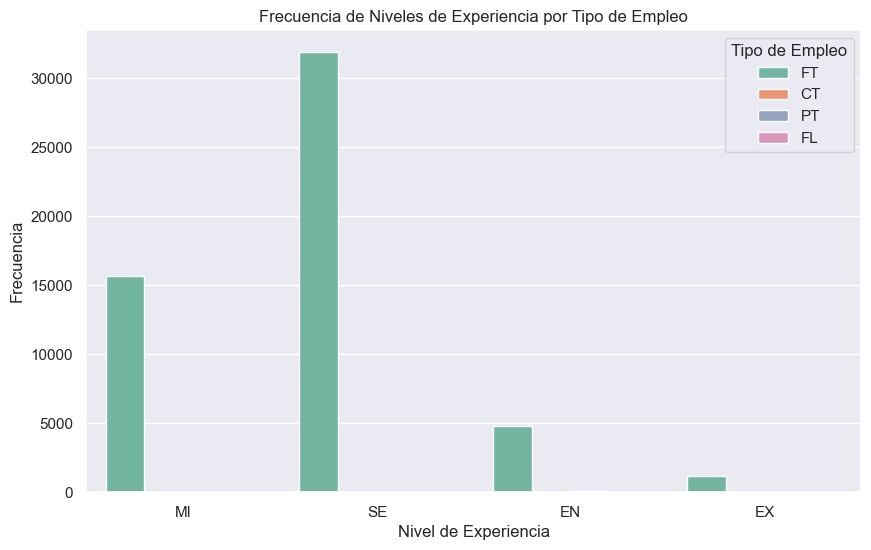

In [26]:
# Frecuencia de experiencia por tipo de empleo
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='experience_level', hue='employment_type', palette="Set2")
plt.title("Frecuencia de Niveles de Experiencia por Tipo de Empleo")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Frecuencia")
plt.legend(title='Tipo de Empleo')
plt.show()

C:\Users\WD\AppData\Local\Temp\ipykernel_3216\284007651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='remote_ratio', palette="coolwarm")


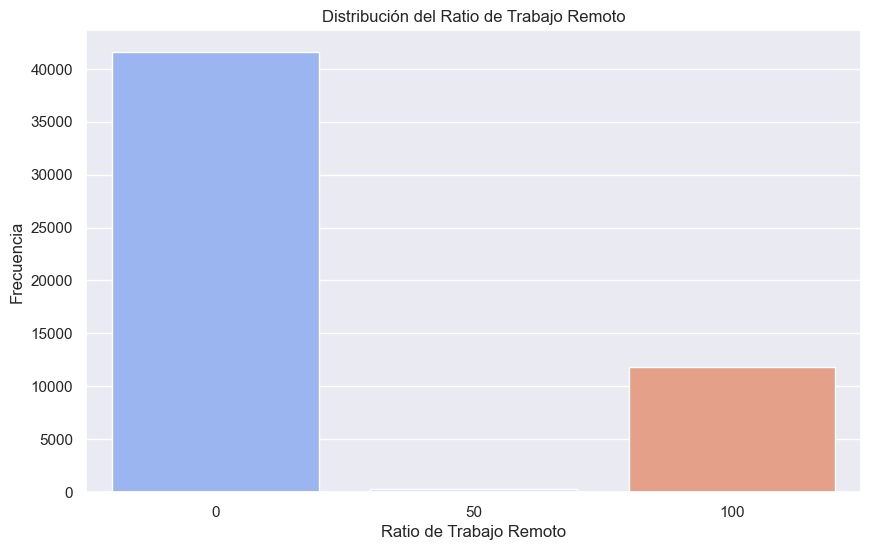

In [27]:
# Distribución del ratio remoto
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='remote_ratio', palette="coolwarm")
plt.title("Distribución del Ratio de Trabajo Remoto")
plt.xlabel("Ratio de Trabajo Remoto")
plt.ylabel("Frecuencia")
plt.show()

In [12]:
X=data['salary_in_usd']
Y=data.drop(['salary_in_usd'],axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)